# Submission statistic

Showing some particular statistic over user submission. The main aspects are an evolution in time and success rate.
 * number of submmission over time
 * succesful submission over time
 * leaderboard evolving - scores and ranking

The ANHIR challenge is hosted on https://anhir.grand-challenge.org.

These particular results are for ANHIR workshop hosted at ISBI 2019 in Venice, Italy.
In case you want to get some further evaluation related to new submission, you may contact one of the ANHIR administrators because the full submission is required, see https://anhir.grand-challenge.org/Organizers.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, sys
import glob, json
import shutil

import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path += [os.path.abspath('.'), os.path.abspath('..')]  # Add path to root
from birl.utilities.data_io import update_path
from birl.utilities.visualisation import draw_matrix_user_ranking
from birl.utilities.evaluate import grouping_cumulative, aggregate_user_score_timeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading submission table

The required input table is exported from https://anhir.grand-challenge.org/evaluation/jobs/ which is accessible for ANHIR administrators.

In [3]:
PATH_SUBMISSIONS = os.path.join(update_path('bm_ANHIR'), 'submissions.csv')
df = pd.read_csv(PATH_SUBMISSIONS)
# conver the data-time columns
for col in ['Created', 'Updated']:
    df[col] = pd.to_datetime(df[col])
df['Team'] = df['User'].apply(lambda txt: txt[txt.index(' (') + 2: txt.index(')')] 
                                          if all(c in txt for c in '()') else None)
df['User'] = df['User'].apply(lambda txt: txt[:txt.index(' (')] if all(c in txt for c in '()') else txt)
# compute time remaining to deadline
df['Till_Deadline'] = - df['Created'].sub(pd.to_datetime('April 1, 2019, 9:00 a.m.'), axis=0)
df['Deadline_days'] = (df['Till_Deadline'] / np.timedelta64(1, 'D')).astype(int)
print ('loaded records: %i' % len(df))
df.head(3)

loaded records: 279


,ID,Created,Updated,User,Status,Position,Comment,Hide/Publish,Team,Till_Deadline,Deadline_days
0,104f40bb-7e23-484d-8383-4a476bff5684,2019-04-01 04:24:00,2019-04-01 04:26:00,Mohammed,Succeeded,9.0,NaN,NaN,NMPN,04:36:00,0
1,6c82a929-2073-4c4f-964c-8c03ff1aecb0,2019-04-01 04:18:00,2019-04-01 04:19:00,Mohammed,Succeeded,NaN,NaN,NaN,NMPN,04:42:00,0
2,0eaa70e6-0be9-44aa-843c-02cba8b4cae9,2019-04-01 03:59:00,2019-04-01 04:00:00,Mohammed,Succeeded,NaN,NaN,NaN,NMPN,05:01:00,0


## Visualise participants info

Showing charts related to individual participants

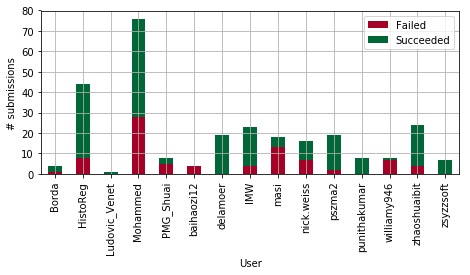

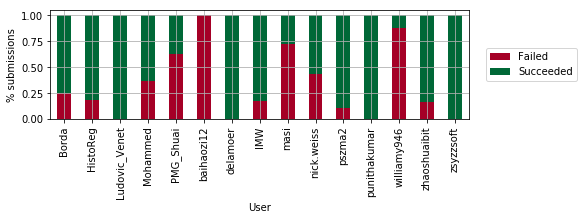

In [4]:
dfx = grouping_cumulative(df, col_index='User', col_column='Status')
_= dfx.plot(kind='bar', stacked=True, figsize=(len(dfx) / 2, 3), grid=True, cmap='RdYlGn')
_= plt.ylabel('# submissions')

# normalize over the sum of all cases
dfx = (dfx.T / dfx.T.sum().astype(float)).T
ax = dfx.plot(kind='bar', stacked=True, figsize=(len(dfx) / 2, 2), grid=True, cmap='RdYlGn')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.7), ncol=1)
_= plt.ylabel('% submissions')

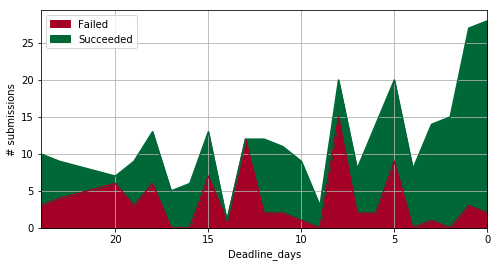

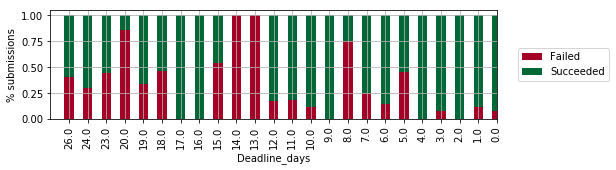

In [5]:
dfx = grouping_cumulative(df, col_index='Deadline_days', col_column='Status')
_= dfx.plot(kind='area', cmap='RdYlGn', figsize=(len(dfx) / 3, 4), grid=True)
_= plt.xlim([len(dfx), 0]), plt.ylabel('# submissions')

# normalize over the sum of all cases
dfx = (dfx.T / dfx.T.sum().astype(float)).T
ax = dfx.plot(kind='bar', stacked=True, cmap='RdYlGn', figsize=(len(dfx) / 3, 2), grid=True)
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.7), ncol=1)
_= plt.xlim([len(dfx), 0]), plt.ylabel('% submissions')

## Visualise submissions info

Showing charts related to particular submissions

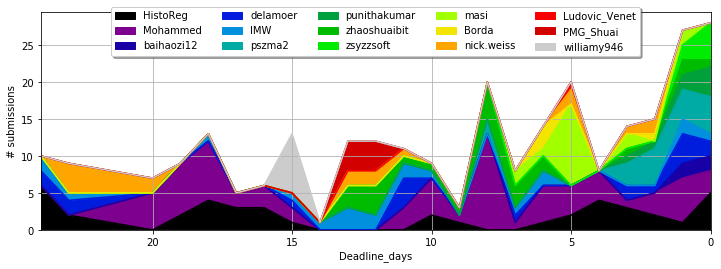

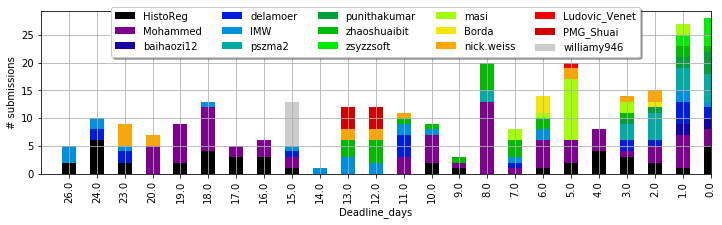

In [6]:
dfx = grouping_cumulative(df, col_index='Deadline_days', col_column='User')
_= dfx.plot(kind='area', cmap='nipy_spectral', figsize=(len(dfx) / 2, 4), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=int(np.ceil(len(dfx.columns) / 3)), fancybox=True, shadow=True)
_= plt.xlim([len(dfx), 0]), plt.ylabel('# submissions')

_= dfx.plot(kind='bar', stacked=True, cmap='nipy_spectral', figsize=(len(dfx) / 2, 3), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=int(np.ceil(len(dfx.columns) / 3)), fancybox=True, shadow=True)
_= plt.xlim([len(dfx), 0]), plt.ylabel('# submissions')

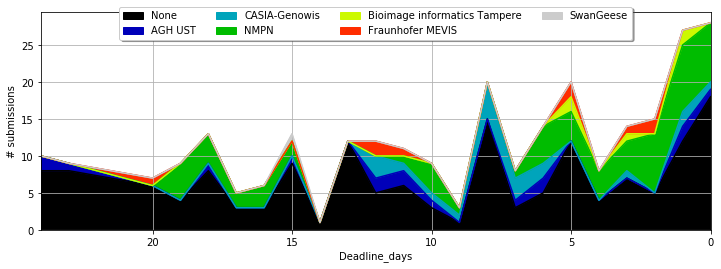

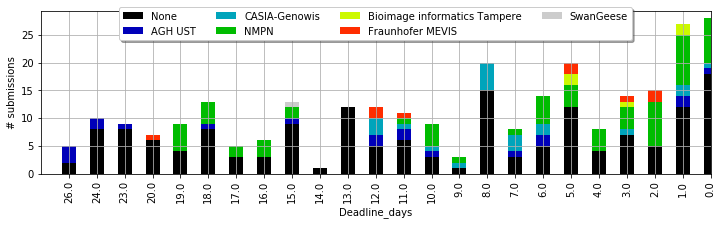

In [7]:
dfx = grouping_cumulative(df, col_index='Deadline_days', col_column='Team')
_= dfx.plot(kind='area', cmap='nipy_spectral', figsize=(len(dfx) / 2, 4), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=int(np.ceil(len(dfx.columns) / 2)), fancybox=True, shadow=True)
_= plt.xlim([len(dfx), 0]), plt.ylabel('# submissions')

_= dfx.plot(kind='bar', stacked=True, cmap='nipy_spectral', figsize=(len(dfx) / 2, 3), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=int(np.ceil(len(dfx.columns) / 2)), fancybox=True, shadow=True)
_= plt.xlim([len(dfx), 0]), plt.ylabel('# submissions')

## Leader-board evolving

Evolving of the automatic leader board over time with respect to a particular score. Exporting on rob results of a particular evalation method is required, see for example https://anhir.grand-challenge.org/evaluation/methods/80cebd88-9133-4802-98cf-53d878e1bb30/ (to do so you have to be challnge admin)

In [8]:
import yaml # https://stackoverflow.com/questions/988228

PATH_SUBMISSIONS = os.path.join(update_path('bm_ANHIR'), 'submission-results.csv')
df_res = pd.read_csv(PATH_SUBMISSIONS)
print ('loaded records: %i' % len(df_res))
df_res.head(3)

loaded records: 183


,Created,Updated,Job,Submission,Status,Result
0,"March 19, 2019, 12:02 p.m.","March 19, 2019, 12:04 p.m.",16ab9924-1d33-4a1e-84d7-6e55c6f201b6,e0845c22-8030-4227-a3ca-c5047d380eae,Succeeded,"{'cases': 'not exported', 'computer': {'file':..."
1,"March 19, 2019, 12:23 p.m.","March 19, 2019, 12:25 p.m.",9cc3dd8f-5331-4748-841b-76db1fdd2534,f4e4453b-7b35-47e2-822a-adf04d2de0ae,Succeeded,"{'cases': 'not exported', 'computer': {'file':..."
2,"March 19, 2019, 1 p.m.","March 19, 2019, 1:03 p.m.",a2325f59-0561-4883-bf89-08b2d15ed444,57d86dc8-bcfd-4661-abca-42ac5f71bf9a,Succeeded,"{'cases': 'not exported', 'computer': {'file':..."


Merge results with user submissions

In [9]:
df2 = df.merge(df_res[['Job', 'Submission', 'Result']], how='right', left_on='ID', right_on='Job')
print ('loaded records: %i' % len(df2))
# get aggregated results
result_str = df2.iloc[0]['Result']
# parse keys from aggregated results
agg_cols = list(yaml.load(result_str)['aggregates'].keys())
# convert aggregated resulst to table columns
for col in agg_cols:
    df2[col] = df2['Result'].apply(lambda ar: yaml.load(ar)['aggregates'][col]
                                   if isinstance(ar, str) else None)
df2 = df2[['Created', 'User', 'Team', 'Till_Deadline', 'Deadline_days'] + agg_cols]
df2.head(3)

loaded records: 183


,Created,User,Team,Till_Deadline,Deadline_days,Average-Max-rTRE,Average-Norm-Time,Average-Robustness,Average-Median-rTRE,Average-Rank-Max-rTRE,Average-used-landmarks,Average-Max-rTRE-Robust,Average-Norm-Time-Robust,Average-Rank-Median-rTRE,Average-Median-rTRE-Robust
0,2019-04-01 04:24:00,Mohammed,NMPN,04:36:00,0,0.0750648,2.540539,0.959315,0.021120,None,1.029598,0.062872,2.549469,None,0.014818
1,2019-04-01 04:18:00,Mohammed,NMPN,04:42:00,0,0.0756789,2.487868,0.955414,0.021160,None,1.029467,0.062904,2.499697,None,0.014807
2,2019-04-01 03:59:00,Mohammed,NMPN,05:01:00,0,0.0774333,2.521503,0.951477,0.023891,None,1.029401,0.063235,2.539681,None,0.016295


### Visualisations

Showing the evolving over time from perspective of the score and mean-time ranking

**Timeline: Average Median rTRE**

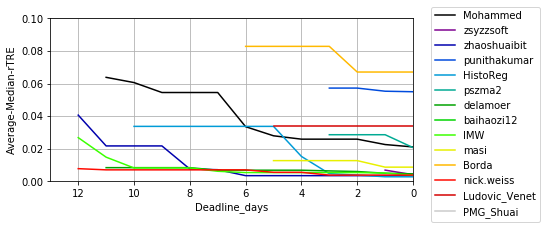

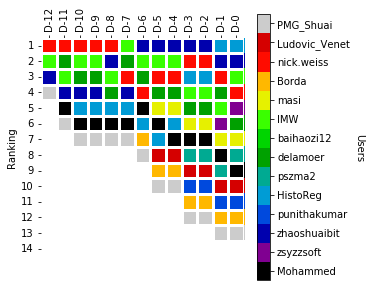

In [14]:
dfx = aggregate_user_score_timeline(df2, 'Deadline_days', 'User', 'Average-Median-rTRE',
                                    lower_better=True, top_down=False, interp=True)
dfx.plot(style='-', cmap='nipy_spectral', figsize=(len(dfx) / 2, 3), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)
_= plt.xlim([len(dfx), 0]), plt.ylim([0, 0.1]), 
_= plt.ylabel('Average-Median-rTRE'), plt.xlabel('Deadline_days')

dfx.index = ['D-%i' % c for c in dfx.index]
fig = draw_matrix_user_ranking(dfx.T[dfx.index[::-1]])

**Timeline: Execution time**

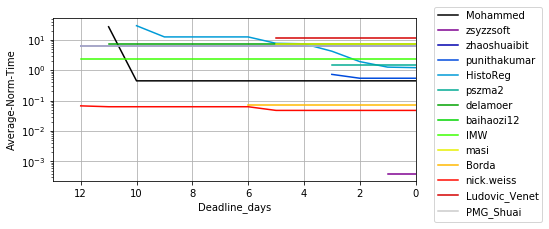

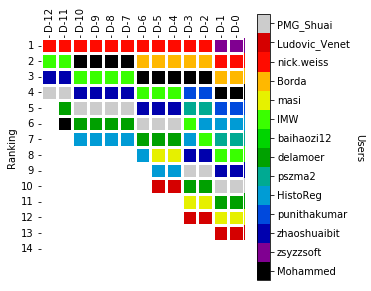

In [15]:
dfx = aggregate_user_score_timeline(df2, 'Deadline_days', 'User', 'Average-Norm-Time',
                                    lower_better=True, top_down=False, interp=True)
dfx.plot(style='-', cmap='nipy_spectral', figsize=(len(dfx) / 2, 3), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)
_= plt.xlim([len(dfx), 0]), plt.yscale('log')
_= plt.ylabel('Average-Norm-Time'), plt.xlabel('Deadline_days')

dfx.index = ['D-%i' % c for c in dfx.index]
fig = draw_matrix_user_ranking(dfx.T[dfx.index[::-1]])

**Timeline: Robustness**

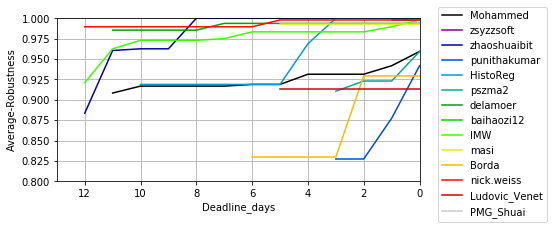

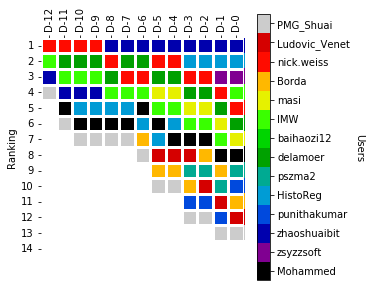

In [16]:
dfx = aggregate_user_score_timeline(df2, 'Deadline_days', 'User', 'Average-Robustness',
                                    lower_better=False, top_down=False, interp=True)
dfx.plot(style='-', cmap='nipy_spectral', figsize=(len(dfx) / 2, 3), grid=True)
_= plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1), ncol=1)
_= plt.xlim([len(dfx), 0]), plt.ylim([0.8, 1.0]), 
_= plt.ylabel('Average-Robustness'), plt.xlabel('Deadline_days')

dfx.index = ['D-%i' % c for c in dfx.index]
fig = draw_matrix_user_ranking(dfx.T[dfx.index[::-1]], higher_better=True)